#*CURSO INTRODUCCIÓN AL MACHINE LEARNING CON PYTHON*
##Alumno : CAMILO ERNESTO FRANCO GUZMAN
# PROYECTO FINAL

**OBJETIVO:**

Implementar  algunos modelos de aprendizaje computucional para afianzar los conocimientos aprendidos durante el curso 
Introductorio al Machine learning con Python a través de un ejercicio practico haciendo uso de las diferentes metodologías y librerías
para determinar y evaluar la métricas de desempeño de cada uno de los modelos desarrollados en presente proyecto.

https://youtu.be/uCOhT5f8y1Q



**CONJUNTO DE DATOS**

Para el proyecto utilice un  [Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) descargado de la plataforma *Kaggle* el cual corresponde a registros de usuarios de una empresa de telecomunicaciones , entre las variables estas género, permanencia, soporte técnico entre otras, la idea del ejercicio es pronosticar si el cliente cancelara el contrato de servicio  o no, a explicar es  la variable "churn" donde *yes* significa que cancela el contrato de servicio y *no* que permanece.

*  CustomerID: the ID of the customer   = (Id Usuario)
*  Gender: male/female=(Género)
*  SeniorCitizen: whether the customer is a senior citizen (0/1)  = (Adulto Mayor)
*  Partner: whether they live with a partner (yes/no) = (Pareja)
*  Dependents: whether they have dependents (yes/no)=(Dependientes)
*  Tenure: number of months since the start of the contract=(Permanencia en el servicio)
*  PhoneService: whether they have phone service (yes/no)= (servicio telefónico)
*  MultipleLines: whether they have multiple phone lines (yes/no/no phone   service)=(Multiples lineas Telefónicas)
*  InternetService: the type of internet service (no/fiber/optic)=(tipo de servicio de Internet)
*  OnlineSecurity: if online security is enabled (yes/no/no internet)=(seguridad en linea habilitada)
*  OnlineBackup: if online backup service is enabled (yes/no/no internet)=(backup de copia de seguridad)
*  DeviceProtection: if the device protection service is enabled (yes/no/no internet)=(Protección de dispositivos)
*  TechSupport: if the customer has tech support (yes/no/no internet)=(soporte Técnico)
*  StreamingTV: if the TV streaming service is enabled (yes/no/no internet)=(servicio de streaming)
*  StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)=(servicio streaming películas)
*  Contract: the type of contract (monthly/yearly/two years)=(duración Contrato)
*  PaperlessBilling: if the billing is paperless (yes/no)=(facturación fisica)
*  PaymentMethod: payment method =(electronic check, mailed check, bank transfer,
credit card)(método de pago)
*  MonthlyCharges: the amount charged monthly (numeric)=(cargo mensual)
*  TotalCharges: the total amount charged (numeric)=(Total cargas)
* Churn: if the client has canceled the contract (yes/no)=(Variable a predecir)








In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#**EXPLORACION DE LOS DATOS**

In [ ]:
# Cargamos el Data set
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Tamaño Dataset
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# la mayoria de las variables son categóricas
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


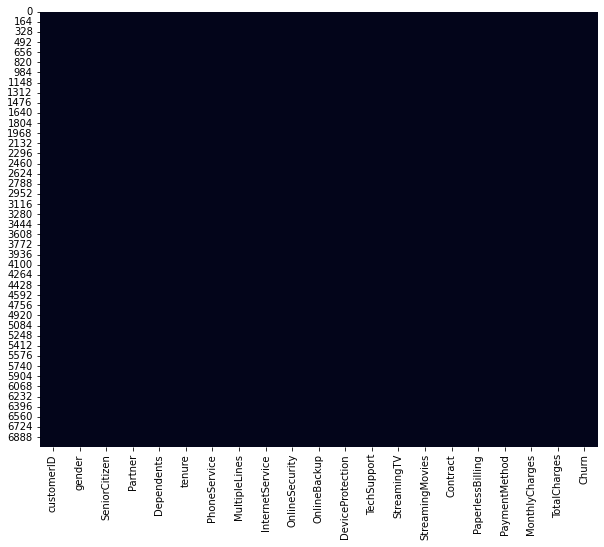

In [ ]:
# El data set en general descargado de Kaggle venia bastante limpio excepto unos pocos datos faltantes en la variavle Totalcharges
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
total_charges=pd.to_numeric(df.TotalCharges,errors='coerce')
df[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.TotalCharges=df.TotalCharges.fillna(0)

In [ ]:
# aca simplemente inspeccion que los valoreS de la variable total charges se hayan completado con cero"0"
df[4380:4381]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0,0.0,No


In [ ]:
# En las siguientes lienas se hace un tratamiento para organizar mejor el nomnbre de las variables
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
string_columns=list(df.dtypes[df.dtypes=='object'].index)

In [ ]:
for col in string_columns:
  df[col]=df[col].str.lower().str.replace(' ','_')

In [ ]:
# las columnas de la variable que deseamos predecir esta definina como "yes" y "no" 
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [ ]:
# Tenemos datos Booleanos que debemos convertir a 1 y 0, en las siguientes lineas de código simplemnte realice una breve inspecion
# para convertir esta variable en valores que el modelo pueda procesar para el entrenamiento es decir en ceros y unos
df.churn=(df.churn=='yes').astype(int)


In [ ]:
(df.churn==1).head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [ ]:
(df.churn==0).head()

0     True
1     True
2    False
3     True
4    False
Name: churn, dtype: bool

In [ ]:
# una vez efectuada la conversión a ceros y unos, se hizo verificación de dicho proceso
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

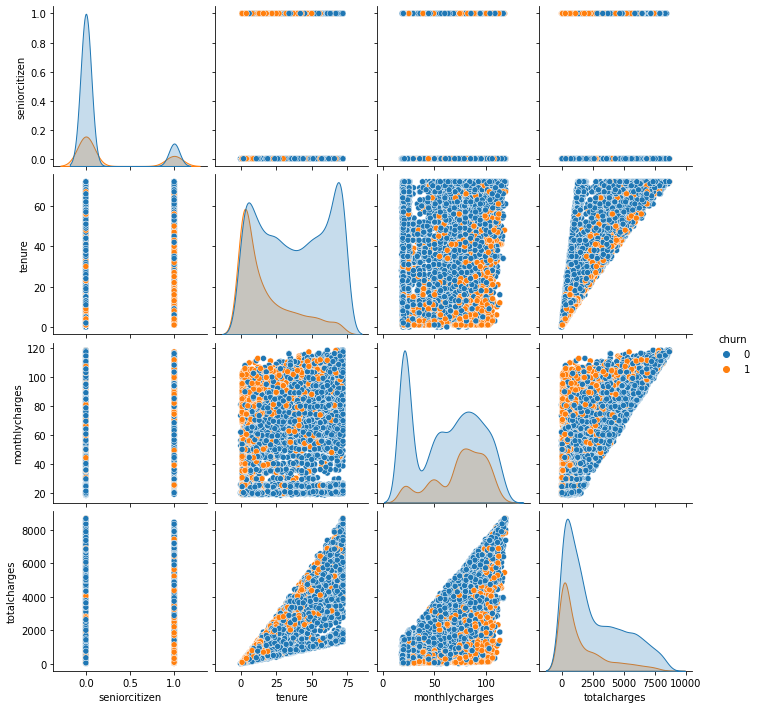

In [ ]:
# se ejecuta un pair plot para ver si existe alguna correlacion pero pues dada las carecticas de dataset existen pocas varibles numericas , 
# se evidencia desde mi concepto una  segmentacion entre la varible montlycharge = cargos mensuales y tenure= permanencia a mayor cobro mensual
# abandonan el servicio y duran poco tiempo
sns.pairplot(data=df,hue="churn")

In [ ]:
# aca tome el 20% de los datos para test y el 80% queda para entrenamiento
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [ ]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [ ]:
# Del 80 % de los datos entrenamiento hacemos de nuevo una particion dejando 33%  para testeo

df_train,df_val=train_test_split(df_train_full,test_size=0.33,random_state=11)
y_train=df_train.churn.values
y_val=df_val.churn.values
del df_train['churn']
del df_val['churn']

In [ ]:
# se validad que ni hat valores nulos
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
# se cuenta cuantos valores de la varible objetivo "churn"  o que queremos describir hay en nuestra particion de datos
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

#Entendimiento del negocio
Como parte del entendimiento de negocio y de los datos objeto del persente estudio se hace una evaluación de algunas métricas para entender un poco mas el comportamiento los datos y entender que variables explican mejor la varible "churn"  , esta métricas  las encontre en el **libro Machine learning bookcamp de Alexey Grigorev edición 2021 capitulo 3 Feature Engineering**

In [ ]:
global_mean=df_train_full.churn.mean()

In [ ]:
# se obtiene proporción de las personas que se retiran del servicio
round(global_mean,3)

0.27

In [ ]:
# Dentro de  listas se separan las variables categóricas y las numéricas para transformarlas las priemras a valores numericos que permitan
# ser entrenadas por el modelo de regresión logistica
categorical=['gender','seniorcitizen','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup',
             'deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod']
             

In [ ]:
# variables numéricas 
numerical=['tenure','monthlycharges','totalcharges']

In [ ]:
# se inspecciona dentro de cada variable predictoras cuantas categorías existen por cada una de ella
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [ ]:
Mujeres=df_train_full[df_train_full.gender=='female'].churn.mean()

In [ ]:
Hombres=df_train_full[df_train_full.gender=='male'].churn.mean()

In [ ]:
# Por género es balanceado el asunto, la propoción de personas que abandonan el 
# servicios es similar para hombre como para mujeres
Mujeres

0.27682403433476394

In [ ]:
Hombres

0.2632135306553911

In [ ]:
con_pareja=df_train_full[df_train_full.partner=='yes'].churn.mean()

In [ ]:
sin_pareja=df_train_full[df_train_full.partner=='no'].churn.mean()

In [ ]:
con_pareja

0.20503330866025166

In [ ]:
sin_pareja

0.3298090040927694

In [ ]:
global_mean=df_train_full.churn.mean()
round(global_mean,3)

0.27

In [ ]:
Mujeres=df_train_full[df_train_full.gender=='female'].churn.mean()
print('Género=Mujer:',round(Mujeres,3))
Hombres=df_train_full[df_train_full.gender=='male'].churn.mean()
print('Genero=hombre:',round(Hombres,3))


Género=Mujer: 0.277
Genero=hombre: 0.263


In [ ]:
con_pareja=df_train_full[df_train_full.partner=='yes'].churn.mean()
print('Con Pareja= no:',round(con_pareja,3))
sin_pareja=df_train_full[df_train_full.partner=='no'].churn.mean()
print('Sin Pareja = no:',round(sin_pareja,3))

Con Pareja= no: 0.205
Sin Pareja = no: 0.33


In [ ]:
risk=Mujeres/round(global_mean,3)
round(risk,3)

1.025

In [ ]:
risk2=con_pareja/round(global_mean,3)
round(risk2,3)

0.759

In [ ]:
global_mean=df_train_full.churn.mean()
df_group=df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff']=df_group['mean']-global_mean
df_group['risk']=df_group['mean']/global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [ ]:
from IPython.display import display

for col in categorical:
  df_group=df_train_full.groupby(by=col).churn.agg(['mean'])
  df_group['diff']=df_group['mean']-global_mean
  df_group['risk']=df_group['mean']/global_mean
  display(df_group)

# Las tablas intentan expresar el nivel de riesgo o de alguna forma el peso tiene  una variable a la hora de explicar el la variable dependiente
# para el caso en la columna risk laS Variables  "contract"	y "techsupport" al parecer son una de las mas importantes
# esta tipo de evaluaciones o análisis me pareceria importante por que la firma u organización sabria donde direccionar mas sus esfuerzos
# en el caso en concreto en el de retener un cliente 


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def calculate_mi(series):
  return mutual_info_score(series,df_train_full.churn)

In [ ]:
df_mi=df_train_full[categorical].apply(calculate_mi)
df_mi=df_mi.sort_values(ascending=False).to_frame(name='MI')# se hace ordenacion de los valores 
df_mi

# El resultado que se obtiene de estas sentencias de código utilizando mutual_info_score de scikit learn es que a mayor 
# a mayor MI= mutual info, mayor incidencia tiene la variable categórica sobre la variable que se desea pronosticar

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [ ]:
# se realiza analisis de correlacion con pandas
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [ ]:
train_dict=df_train[categorical+numerical].to_dict(orient='records')

#MODELO DE REGRESION LOGÍSTICA
**Después de analizar y hacer el tratamiento de partición de los datos se procede a implementar un modelo de clasificación para el caso en estudio uno regresión logística .

Para poder entrenar el modelo ,  a través de [DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) las variables categóricas son transformadas a valores numericos ceros y unos , para esto se genera un diccionario con cada unos de las variables que conforman el Dataset**

In [ ]:
train_dict[0]

{'contract': 'two_year',
 'dependents': 'no',
 'deviceprotection': 'yes',
 'gender': 'male',
 'internetservice': 'dsl',
 'monthlycharges': 86.1,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'yes',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'yes',
 'tenure': 71,
 'totalcharges': 6045.9}

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv=DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train=dv.transform(train_dict)

In [ ]:
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [ ]:
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='liblinear',random_state=1)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
# se efectua la vectorizacion también para los Datos de prueba

val_dict=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dict) # X_val CORRESPONDE A LA PROPORCIÓN DE DATOS DE PRUEBA

In [ ]:
#y_pred=model.predict_proba(X_val)
y_pred=model.predict(X_val) # Se efectua la prediccion con los datos de prueba X_val

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
for i in range(10):
  print(f'Predicción: {y_pred[i]}, Etiqueta:{y_val[i]}\n')


Predicción: 0, Etiqueta:0

Predicción: 0, Etiqueta:1

Predicción: 0, Etiqueta:0

Predicción: 0, Etiqueta:1

Predicción: 0, Etiqueta:0

Predicción: 0, Etiqueta:0

Predicción: 0, Etiqueta:0

Predicción: 0, Etiqueta:0

Predicción: 0, Etiqueta:0

Predicción: 0, Etiqueta:0



In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
Accuracy=accuracy_score(y_val, y_pred)
print(f'EL valor del accuracy es :',Accuracy)
# PRECISIÓN

EL valor del accuracy es : 0.8016129032258065


In [ ]:
# Evaluo con un hiperparámetro eliminando el intercepto  para ver que cambios tiene el  accuaracy

model1=LogisticRegression(solver='liblinear',fit_intercept=False,random_state=1)# se supriem el intercepto


In [ ]:
model1.fit(X_train,y_train)
y_pred = model1.predict(X_val)
Accuracy=accuracy_score(y_val, y_pred)
print(f'EL valor del accuracy es :',Accuracy)
# no hay un cambio a priori en el resultado 

EL valor del accuracy es : 0.8005376344086022


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_val)
cnf_matrix=confusion_matrix(y_val,y_pred)
cnf_matrix
# se puede verificar en la matriz de consusión que los resultados son muy similares como ya lo mostraba el accuracy
# no hay cambio importante al suprimir el intercepto


array([[1202,  172],
       [ 197,  289]])

In [ ]:
labels = [0, 1]
c = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(c, index = labels, columns = labels)

,0,1
0,1202,172
1,197,289


In [ ]:
#VP=1202 Verdaderos Positivos ;es decir , acierta que mantienen el contrato de servicio
#VN= 289 Verdaderos Negativos ; es decir acierta que se retiran del contrato
#FP= 197 Falsos Positivos ; es decir personas que  cancelaron el contrato pero los clasificó como personas que permanecieron
#FN = 172 Falsos Negativos ; Clasificó personas que no se retiraron como retiro ESTE CASO SERIA EL MENOS GRAVE DADO QUE PARA LA COMPAÑIA
# SON PERSONAS QUE CONTINUARON , HABRIA QUE EVALUAR QUE PRESUPUESTO SE DESTINO PARA RETENER ESOS CLIENTES 

In [ ]:
y_pred=model1.predict(X_val)
cnf_matrix=confusion_matrix(y_val,y_pred)
cnf_matrix

array([[1201,  173],
       [ 198,  288]])

In [ ]:
labels = [0, 1]
c = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(c, index = labels, columns = labels)

,0,1
0,1201,173
1,198,288


In [ ]:
# MODELO SIN INTERCEPTO CON LOS PESOS POR CADA UNA DE LAS VARIABLES
print(f"Pesos w: {model1.coef_}")
print(f"Intercepto w_0: {model1.intercept_}")

Pesos w: [[ 5.55856216e-01 -9.19980406e-02 -6.00240120e-01 -3.82032028e-02
  -9.81787417e-02  9.46355524e-02 -1.24516653e-01 -1.06500844e-01
  -3.45554152e-02 -1.01826529e-01 -3.35637208e-01  3.23771916e-01
  -1.24516653e-01  9.92641239e-05 -1.69866244e-01  1.15279773e-01
  -8.17954730e-02  1.30938933e-01 -1.24516653e-01 -1.42804224e-01
   2.52620695e-01 -1.24516653e-01 -2.64485987e-01 -2.19116994e-01
   8.27350496e-02 -5.62107435e-02 -8.01712010e-02 -3.02318617e-02
  -1.39534740e-01  1.70439274e-01 -1.37054617e-01  1.15279773e-01
  -2.51661717e-01  2.96329687e-01 -9.21835205e-02 -1.24516653e-01
   8.03182290e-02 -1.06366146e-01 -1.24516653e-01  9.45008540e-02
   1.72762500e-01 -1.24516653e-01 -1.84627792e-01 -6.93888649e-02
   4.45716662e-04]]
Intercepto w_0: 0.0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val,    
                            y_pred,                         
                            digits=4)) 

              precision    recall  f1-score   support

           0     0.8585    0.8741    0.8662      1374
           1     0.6247    0.5926    0.6082       486

    accuracy                         0.8005      1860
   macro avg     0.7416    0.7333    0.7372      1860
weighted avg     0.7974    0.8005    0.7988      1860



# MODELO KNN 
K-nearest neighbours 

Ahora entrenamos los datos a través de otro modelo para poder evidenciar su desempeño

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predictions=knc.predict(X_train)

In [ ]:
# De entrada con el hiperparametro de 1 (vecinos más se obtuvo un mejor resultado de precisión con el modelo de Regresión Logistica)

from sklearn.metrics import accuracy_score

y_pred = knc.predict(X_val)
Accuracy=accuracy_score(y_val, y_pred)
print(f'EL valor del accuracy es :',Accuracy)

EL valor del accuracy es : 0.7198924731182795


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=knc.predict(X_val)
cnf_matrix=confusion_matrix(y_val,y_pred)
cnf_matrix

array([[1100,  274],
       [ 247,  239]])

In [ ]:
labels = [0, 1]
c = confusion_matrix(y_val, y_pred, labels = labels)
pd.DataFrame(c, index = labels, columns = labels)

,0,1
0,1100,274
1,247,239


In [ ]:
#VP=1100 Verdaderos Positivos ;es decir , acierta que mantienen el contrato de servicio
#VN= 239 Verdaderos Negativos ; es decir acierta que se retiran del contrato
#FP= 247 Falsos Positivos ; es decir personas que  cancelaron el contrato pero los clasificó como personas que permanecieron
#FN = 274 Falsos Negativos ; Clasificó personas que no se retiraron como retiro ESTE CASO SERIA EL MENOS GRAVE DADO QUE PARA LA COMPAÑIA
# SON PERSONAS QUE CONTINUARON , HABRIA QUE EVALUAR QUE PRESUPUESTO SE DESTINO PARA RETENER ESOS CLIENTES 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val,    
                            y_pred,                         
                            digits=4)) 

              precision    recall  f1-score   support

           0     0.8166    0.8006    0.8085      1374
           1     0.4659    0.4918    0.4785       486

    accuracy                         0.7199      1860
   macro avg     0.6413    0.6462    0.6435      1860
weighted avg     0.7250    0.7199    0.7223      1860



In [ ]:
# REALICE UN BUCLE FOR PARA VER COMO SE IBA COMPONRTANDO LA PRECISIÓN 
from sklearn.metrics import accuracy_score
for n in range(1,11):
  knc_precision = KNeighborsClassifier(n_neighbors=n)
  knc_precision.fit(X_train, y_train)
  y_pred = knc_precision.predict(X_val)
  Accuracy=accuracy_score(y_val, y_pred)
  print(f'EL valor del accuracy es con {n} vecinos es:',Accuracy)


EL valor del accuracy es con 1 vecinos es: 0.7198924731182795
EL valor del accuracy es con 2 vecinos es: 0.7586021505376344
EL valor del accuracy es con 3 vecinos es: 0.7543010752688172
EL valor del accuracy es con 4 vecinos es: 0.7666666666666667
EL valor del accuracy es con 5 vecinos es: 0.760752688172043
EL valor del accuracy es con 6 vecinos es: 0.7731182795698924
EL valor del accuracy es con 7 vecinos es: 0.7623655913978494
EL valor del accuracy es con 8 vecinos es: 0.7801075268817205
EL valor del accuracy es con 9 vecinos es: 0.7758064516129032
EL valor del accuracy es con 10 vecinos es: 0.7801075268817205


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val,    
                            y_pred,                         
                            digits=4)) 

              precision    recall  f1-score   support

           0     0.8083    0.9207    0.8608      1374
           1     0.6305    0.3827    0.4763       486

    accuracy                         0.7801      1860
   macro avg     0.7194    0.6517    0.6686      1860
weighted avg     0.7618    0.7801    0.7604      1860



**Conclusiones :** Una vez evaluados los dos modelos que utilice para análisis concluyo que segun las métricas de desempeño deberia utilizarse el módelo de Regresión logistica.

Otra de las conclusiones más alla de los resultados es que definitivamente entender y preparar bien los datos es fundamental, si bien es cierto utilice unos datos que por demás estaba bastante  limpios el desmenuzarlos y entenderlos es una tarea ardua.

Otra de las cosas que observe en este ejercicio de aprendizaje es que el volúmen de información ,modelos y  métodos para abordar el conjunto de datos sujeto de estudio (supongo mientras hay más propiedad para la resolución de problema )es bastante abrumador y desde mi punto de vista se hace pesado al momento de hacer la elección.

